In [17]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [18]:
def read_file_data(file_name, geom_path):
    nodes = []
    data = []
    x = []
    y = []
    z = []
    with open(file_name, 'r') as f:
        for line in f:
            if 'Node' in line:
                n = line.split()
                nodes.append(int(n[1]))
                line2 = f.readline()
                data.append(float(line2.split()[0]))
    with open(geom_path + '/nodes.txt') as f:
        for line in f:
            if 'Node' in line:
                line2 = f.readline()
                x.append(float(line2.split()[0]))
                line2 = f.readline()
                y.append(float(line2.split()[0]))
                line2 = f.readline()
                z.append(float(line2.split()[0]))
    node_df = pd.DataFrame({'Node numbers': nodes,
                           'Concentration': data,
                           'x': x,
                           'y': y,
                           'z': z})
    node_df['% Height'] = (node_df['z'] - node_df['z'].min())/(node_df['z'].max() - node_df['z'].min()) * 100
    element_arr = np.zeros((len(node_df)-1, 2))
    orders = np.zeros(len(node_df) - 1)
    with open(geom_path + '/orders.txt') as f:
        c = 0
        for line in f:
            if 'Values' in line:
                line2 = f.readline()
                orders[c] = int(line2.split()[0])
                c += 1
    with open(geom_path + '/elements.txt', 'r') as f:
        for line in f:
            if 'Element' in line:
                elem_number = int(line.split()[1])
                next(f)
                line2 = f.readline()
                node1 = int(line2.split()[0])
                node2 = int(line2.split()[1])
                conc1 = node_df[node_df['Node numbers'] == node1]['Concentration'].iloc[0]
                conc2 = node_df[node_df['Node numbers'] == node2]['Concentration'].iloc[0]
                element_arr[elem_number - 1, 1] = (conc1 + conc2) / 2.0
    element_arr[:, 0] = orders
    element_df = pd.DataFrame(element_arr, columns={'Concentration', 'Order'})
    element_df['Order'] = element_df['Order'].astype(int)
    name, ext = os.path.splitext(file_name)
    if os.path.isfile(name + '_large_tc.exelem'):
        tc_list = []
        with open(name + '_large_tc.exelem', 'r') as f:
            for line in f:
                if 'Values' in line:
                    line2 = f.readline()
                    tc_list.append(float(line2.split()[0]))
        element_df['Time Constant'] = pd.Series(np.array(tc_list))
    return node_df, element_df

In [44]:
ndfn, ldfn = read_file_data('lumped/Results/P2BRP268-H12816_CAS_LRA_normal.exnode', 'lumped/Geom')
ndfc, ldfc = read_file_data('lumped/Results/P2BRP268-H12816_CAS_LRA_con_6.exnode', 'lumped/Geom')

In [45]:
ldfc.head(5)

,Order,Concentration,Time Constant
0,20,0.575120,0.21623
1,20,0.575117,0.21447
2,20,0.575057,0.21270
3,20,0.575047,0.21094
4,20,0.575032,0.20917


<IPython.core.display.Javascript object>


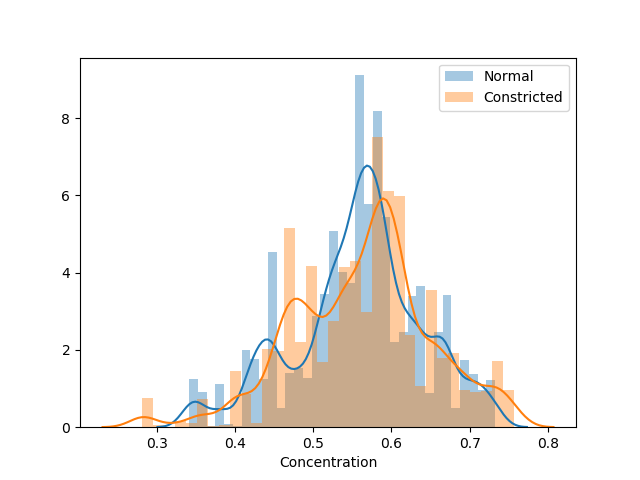

In [46]:
# plt.figure(1, figsize=(8,6), dpi=110)
plt.figure(1)
sns.distplot(ldfn['Concentration'], label='Normal')
sns.distplot(ldfc['Concentration'], label='Constricted')
plt.legend()

<IPython.core.display.Javascript object>


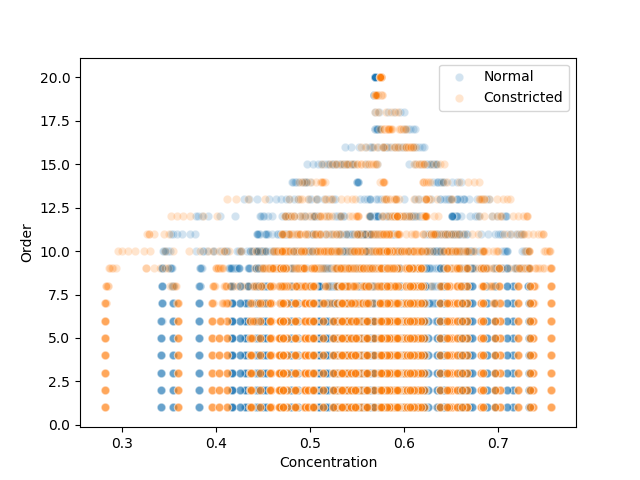

In [47]:
plt.figure(2)
sns.scatterplot(ldfn['Concentration'], ldfn['Order'], alpha=0.2, label='Normal')
sns.scatterplot(ldfc['Concentration'], ldfc['Order'], alpha=0.2, label='Constricted')
plt.legend()

In [48]:
ldfng = ldfn.groupby(pd.cut(ldfn['Order'], bins=20)).mean()
ldfcg = ldfc.groupby(pd.cut(ldfc['Order'], bins=20)).mean()
err_n = ldfn.groupby(pd.cut(ldfn['Order'], bins=20))['Concentration'].std()
err_c = ldfc.groupby(pd.cut(ldfc['Order'], bins=20))['Concentration'].std()

<IPython.core.display.Javascript object>


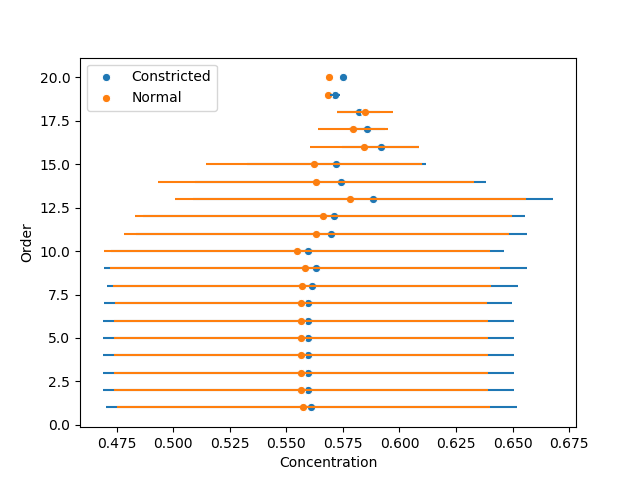

/people/aras520/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2813: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


In [49]:
plt.figure(3)
sns.scatterplot(ldfcg['Concentration'], ldfcg['Order'], label='Constricted')
plt.errorbar(ldfcg['Concentration'], ldfcg['Order'], xerr=err_c, fmt=None, label=None)
sns.scatterplot(ldfng['Concentration'], ldfng['Order'], label='Normal')
plt.errorbar(ldfng['Concentration'], ldfng['Order'], xerr=err_n, fmt=None, label=None) 
plt.legend(loc='upper left')

<IPython.core.display.Javascript object>


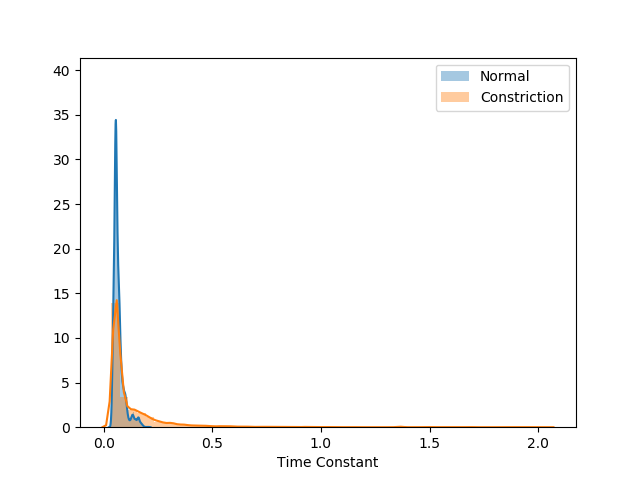

In [50]:
plt.figure(4)
sns.distplot(ldfn['Time Constant'], label='Normal')
sns.distplot(ldfc['Time Constant'], label='Constriction')
plt.legend()

<IPython.core.display.Javascript object>


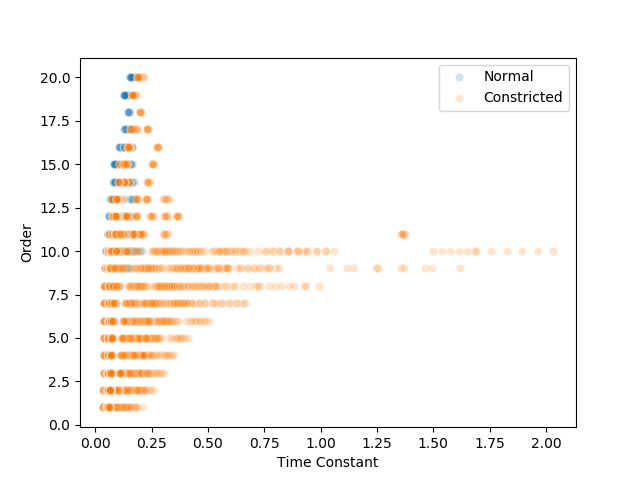

In [51]:
plt.figure(5)
sns.scatterplot(ldfn['Time Constant'], ldfn['Order'], alpha=0.2, label='Normal')
sns.scatterplot(ldfc['Time Constant'], ldfc['Order'], alpha=0.2, label='Constricted')
plt.legend()

In [52]:
ldfng = ldfn.groupby(pd.cut(ldfn['Order'], bins=20)).mean()
ldfcg = ldfc.groupby(pd.cut(ldfc['Order'], bins=20)).mean()
err_n = ldfn.groupby(pd.cut(ldfn['Order'], bins=20))['Time Constant'].std()
err_c = ldfc.groupby(pd.cut(ldfc['Order'], bins=20))['Time Constant'].std()

<IPython.core.display.Javascript object>


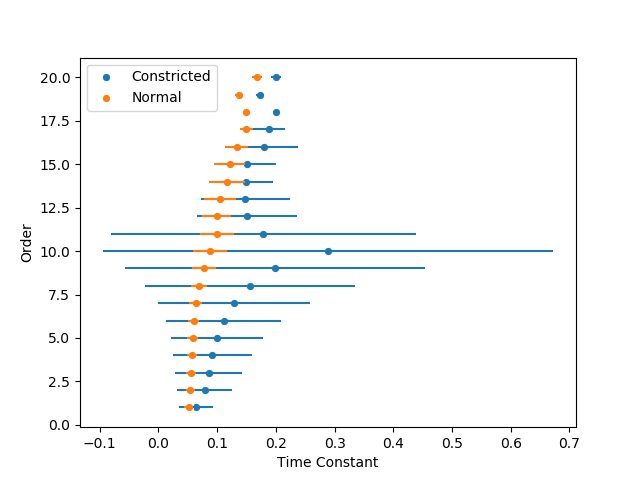

/people/aras520/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2813: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


In [53]:
plt.figure(6) 
sns.scatterplot(ldfcg['Time Constant'], ldfcg['Order'], label='Constricted')
plt.errorbar(ldfcg['Time Constant'], ldfcg['Order'], xerr=err_c, fmt=None, label=None) 
sns.scatterplot(ldfng['Time Constant'], ldfng['Order'], label='Normal')
plt.errorbar(ldfng['Time Constant'], ldfng['Order'], xerr=err_n, fmt=None, label=None)
plt.legend(loc='upper left')